# Ariline Customer Satisfaction (Lab #1: DS7331)

SMU Student collaboration:
1. Renfeng Wang.
2. Alexander Sepenu.
3. Zachary Zaiken.
4. Venkata 'MG' Vanga
---------------------------------------------

## 1.0 Business Understanding

The data used in this analysis is from the "Airline Passenger Satisfaction" dataset sourced from Kaggle. 

https://www.kaggle.com/binaryjoker/airline-passenger-satisfaction.  
        
This dataset comes from a survey that measured Airline passenger satisfaction and to understand the various factors that contribute to airline passenger perceived level of satisfaction. The survey was conducted to gather data so the airline companies could improve on Quality of Service (QoS) that will meet the expectations of passengers and help these companies stay competitive within the industry. The model when built will help these companies' direct resources that will target specific attributes to improve on services hence saving them millions of dollars that would otherwise gone to a gamut of service improvement campaigns. The dataset can be leveraged into a supervised machine learning classification model that can predict customer satisfaction for this dataset set as well as predict future flights experiences based on attributes and datapoints used.

Statistical models that can be used for the desired outcome for this analysis include PCA as a dimensionality reduction method to reduce the dimensionality of the variables in this large data sets into a smaller ones that still contains most of the information we will need. Logistic regression, random forests, naive-bayes, KNN or LDA/QDA will also be employed. The expected outcome of such a model after dimensionality reduction would be to correctly predict a passenger’s flight satisfaction description from training/test set split or K-fold cross validation while maintaining high and consistent measurement for overall model accuracy, sensitivity and specificity. 

Cross validation steps will  ensure that the model was not overfitted based on training data and will work for future data that has either not yet been collected or where all other attributes are known but not satisfaction. By maximizing both sensitivity and specificity the model is robust to a skewed sample or dataset, the amount of false positives is just as important as the ones that were matched correctly. In addition, By running several classification model types we can ensure that multi approaches were taken and tested out before a model its accuracy statistics are deemed final.


In this Lab 1 we mainly focus on visualizing the dataset, EDA and doing the PCA (Principal Component Analysis).
Further during the course, the dataset can be leveraged into machine learning classification model that can predict customer satisfaction for this dataset, as well provide more prediction of flight distance and satisfaction relationship.

---------------------------------------------
The data was downloaded from Kaggle as CSV, then we imported Airline passenger data from github into Ipython notebook.

In [2]:
import pandas as pd
import numpy as np
# read in the csv file
airline_df = pd.read_csv('https://raw.githubusercontent.com/wangrenfeng0/Machine-Learning-I/main/airline_passenger_satisfaction.csv') 

---------------------------------------------
## 2.0 Data Meaning Type

#### Below is the table showing data types, attributes' descriptions and scale of values. Continuous Variables are highlighted in gray color.

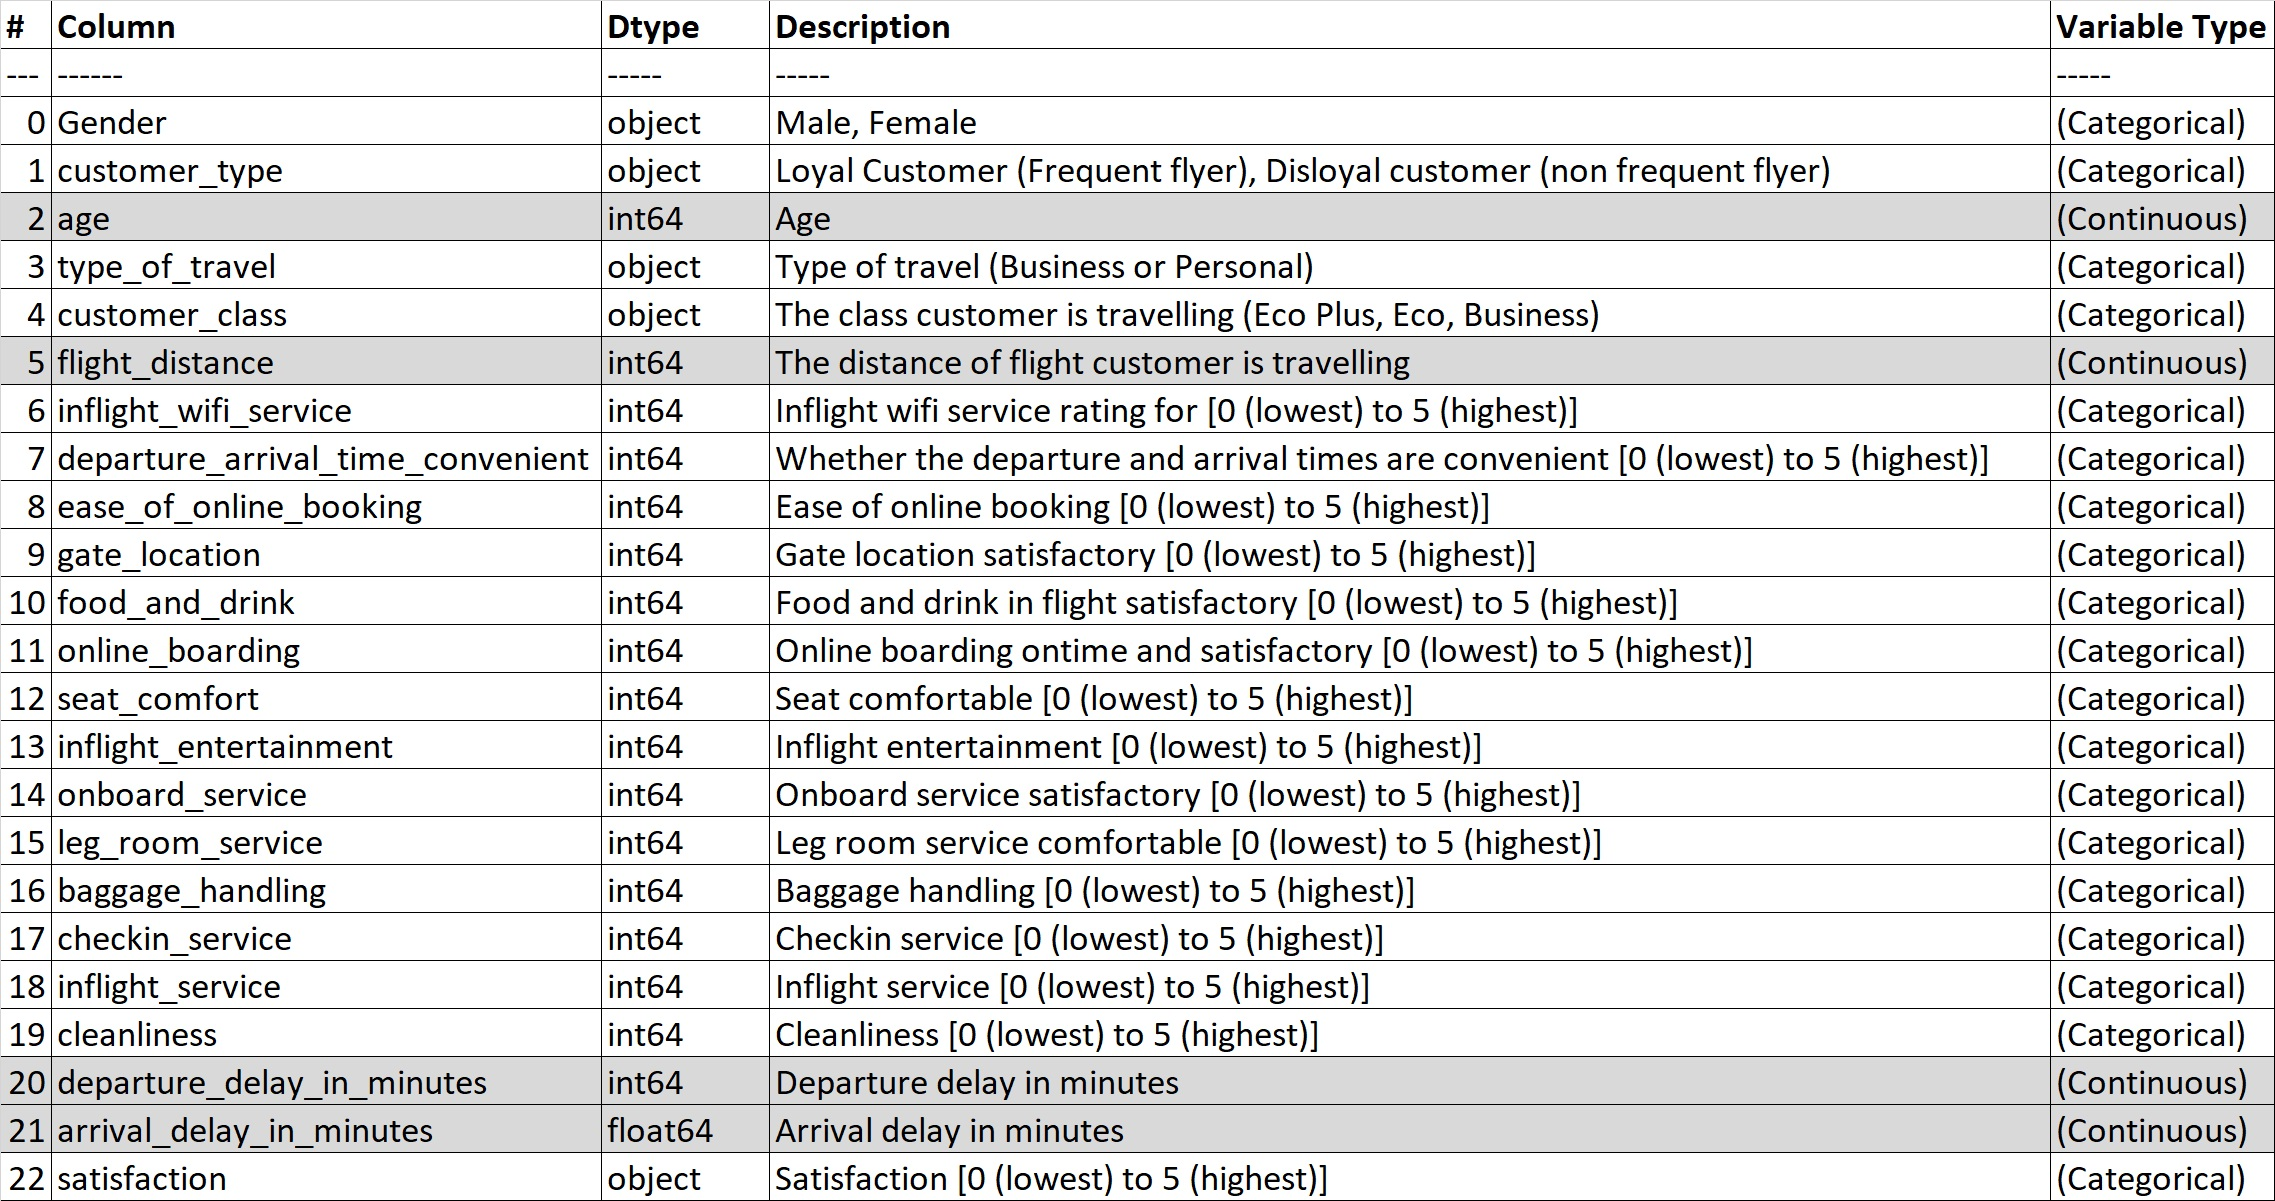

Visualize the dataset using dataframe head.

In [3]:
airline_df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


We can observe from the above table that there are 24 attributes in the dataset. 
'Unnamed:0' being the ID of the each row. 
We delete this attribute and continue with Exploratory Data Analysis (EDA) for the remaining 23 attributes.

In [4]:
if 'Unnamed: 0' in airline_df:
    del airline_df['Unnamed: 0']

airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

---------------------------------------------

## 3.0 Data Quality


It can be observed from Data meaning type that there are total 129,880 records of data in each of 23 variables except for variable:

'arrival_delay_in_minutes' which only has 129,487 records. For the 393 missing values which constitute about 0.3% of the total arrival_delay_in_minutes count, since this is a such small count and such small influence, we are going to delete these rows and continue with our EDA.

In [5]:
airline_df = airline_df.dropna()
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  object 
 4   customer_class                     129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

Entire dataset now only has 129,487 records for the EDA.

<Figure size 288x288 with 0 Axes>

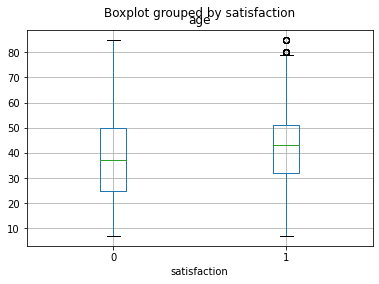

<Figure size 288x288 with 0 Axes>

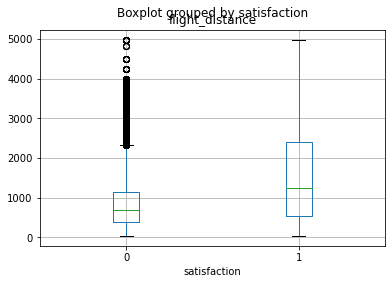

<Figure size 288x288 with 0 Axes>

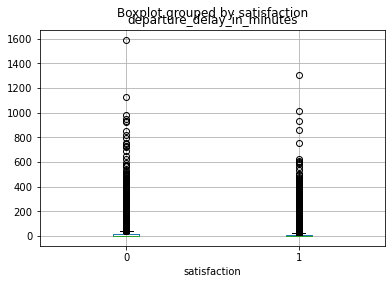

<Figure size 288x288 with 0 Axes>

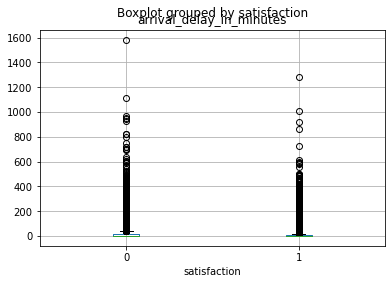

In [23]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

vars_to_plot_separate = [['age'],
                         ['flight_distance'],
                         ['departure_delay_in_minutes'], ['arrival_delay_in_minutes']]

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.figure(figsize=(4, 4))
    ax = airline_df.boxplot(column=plot_vars, by='satisfaction')
plt.show()

We have also checked for outliers in the dataset by boxplots. The only variables are subjected to this analysis are four continuous variables (departure_delay_in_minutes, arrival_delay_in_minutes, flight distance and age). There appeared to be some outliers, but not until we fit some models, can we calculate Cook's D or leverage to idenitify and deal with them.

## 4.0 Simple Statistics


Grouping the variables by categorical, ordinal and continuous.

In [7]:
# let's start first by collecting the continuous features
airline_continuous_features = ['age', 'flight_distance', 
                       'departure_delay_in_minutes', 'arrival_delay_in_minutes']

# and then the ordinal features.
airline_ordinal_features = ['inflight_wifi_service','departure_arrival_time_convenient','gate_location',
                    'food_and_drink','online_boarding','seat_comfort','inflight_entertainment',
                    'onboard_service',  'leg_room_service' ,'baggage_handling' ,'checkin_service' ,  
                     'inflight_service','cleanliness']

# we won't modify these variables, keep them as categorical
airline_categ_features = ['Gender','customer_type','type_of_travel','customer_class','satisfaction'];


airline_continuous_features_satis = ['age', 'flight_distance', 
                       'departure_delay_in_minutes', 'arrival_delay_in_minutes','satisfaction']


airline_nonflight_ordinal_features_satis = ['gate_location','departure_arrival_time_convenient',
                    'online_boarding','baggage_handling' ,'checkin_service' , 'satisfaction']

Summary of Variables:

In [8]:
airline_df[airline_continuous_features].describe()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
count,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,14.643385,15.091129
std,15.117597,997.560954,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


It is observed from the continuous variable summary that Min age in the data set is 7 year-old and max age is 85 year-old.

The minimum flight distance traveled is 32 nautical miles, the max distance traveled is 4983 nautical miles.

The max departure/arrival delays are around approx. 1580 min (26 hrs), but most of the data in these two variables are 0 which means the data is heavily skewed.


In [9]:
airline_df[airline_categ_features].describe()

,Gender,customer_type,type_of_travel,customer_class,satisfaction
count,129487,129487,129487,129487,129487
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65703,105773,89445,61990,73225


All categorical variables in this data set have two or three possibilities and summary is shown below:

To generate statistical significance to variables we have modified variables:

- 1. Gender:         Male as 1; Female as 0.
- 2. Customer Type:  Loyal as 1; Disloyal as 0.
- 3. Travel Type:    BusinessTravel as 0 and PersonalTravel as 1.
- 4. Customer Class: Eco as 0; Eco Plus as 1 and Business as 2.
- 5. Satisfaction:   neutral or dissatisfied as 0 and satisfied as 1.


In [10]:
airline_df[airline_ordinal_features].describe()

,inflight_wifi_service,departure_arrival_time_convenient,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,2.728544,3.057349,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222
std,1.329235,1.526787,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


All ordinal features are survey from 0 (lowest rating) to 5 (highest rating). Most ordinal variables have mean and median around 3 which suggests normally distributed in ordinal variables.

## 5.0 Visualize Attributes

In [11]:
airline_df['age_range'] = pd.cut(airline_df.age,[0,16,65,120],3,labels=['child','adult','senior'])
airline_df.age_range.describe()

gender={'Male':1,'Female':0}
Customer_Type={'Loyal Customer':1,'disloyal Customer':0}
Type_of_Travel={'Personal Travel':1, 'Business travel':0}
Customer_Class = {'Eco':0,'Eco Plus':1,'Business':2}
Satisfaction ={'neutral or dissatisfied':0,'satisfied':1}
airline_df.Gender = [gender[item] for item in airline_df.Gender]
airline_df.customer_type = [Customer_Type[item] for item in airline_df.customer_type]
airline_df.type_of_travel = [Type_of_Travel[item] for item in airline_df.type_of_travel]
airline_df.customer_class = [Customer_Class[item] for item in airline_df.customer_class]
airline_df.satisfaction = [Satisfaction[item] for item in airline_df.satisfaction]
airline_df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,age_range
0,1,1,13,1,1,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,child
1,1,0,25,0,2,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,adult
2,0,1,26,0,2,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,adult
3,0,1,25,0,2,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,adult
4,1,1,61,0,2,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,adult


Above table shows the modified variables imputed into the main dataframe. Age range is imputed at end of the table.

-- Age_group percentage in the total dataset

In [12]:
airline_grouped0 = airline_df.groupby(by=['age_range'])
print('Percentage of age range in the total dataset:')
print(airline_grouped0.age.count()/len(airline_df)*100)

Percentage of age range in the total dataset:
age_range
child      6.633098
adult     89.480025
senior     3.886877
Name: age, dtype: float64


It can be observed that 89.5% adults and 6.6% children and 3.9% seniors are there in the total dataset.

-- Satisfaction grouped by customer_type  Loyal as 1; Disloyal as 0.

satisfaction                False     True 
customer_type age_range                    
0             child      0.781690  0.218310
              adult      0.758049  0.241951
              senior     0.864486  0.135514
1             child      0.854421  0.145579
              adult      0.480348  0.519652
              senior     0.813032  0.186968


<AxesSubplot:ylabel='customer_type,age_range'>

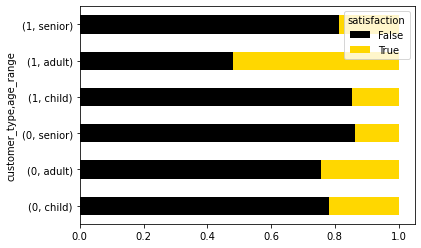

In [13]:
satisfaction_counts = pd.crosstab([airline_df['customer_type'],airline_df['age_range']],airline_df.satisfaction.astype(bool))
satisfaction_rates = satisfaction_counts.div(satisfaction_counts.sum(1).astype(float),axis=0)
print(satisfaction_rates)
satisfaction_rates.plot(kind='barh',stacked=True,color=['black','gold'])

 It can be observed that for Loyal customers in the adult group have the most satisfaction percentage (51.96%).
 
 While Seniors have the lowest percentage (13.55%) of satisfaction in disloyal customer group.

--------------------------------

-- Satisfaction grouped by travel_type  Business as 0; PersonalTravel as 1.

satisfaction                 False     True 
type_of_travel age_range                    
0              child      0.694892  0.305108
               adult      0.403422  0.596578
               senior     0.662887  0.337113
1              child      0.897436  0.102564
               adult      0.897784  0.102216
               senior     0.910766  0.089234


<AxesSubplot:ylabel='type_of_travel,age_range'>

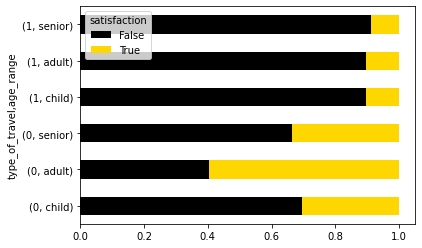

In [14]:
satisfaction_counts = pd.crosstab([airline_df['type_of_travel'],airline_df['age_range']],airline_df.satisfaction.astype(bool))
satisfaction_rates = satisfaction_counts.div(satisfaction_counts.sum(1).astype(float),axis=0)
print(satisfaction_rates)
satisfaction_rates.plot(kind='barh',stacked=True,color=['black','gold'])

 It can be observed that for business travel the adults have the most satisfaction percentage (59.65%).
 
 While Seniors have the lowest satisfaction percentage (8.92%) in personal travel category.

--------------------------------

-- Satisfaction grouped by gender  Female as 0; Male as 1.

satisfaction         False     True 
Gender age_range                    
0      child      0.846774  0.153226
       adult      0.539894  0.460106
       senior     0.821275  0.178725
1      child      0.842787  0.157213
       adult      0.527822  0.472178
       senior     0.808966  0.191034


<AxesSubplot:ylabel='Gender,age_range'>

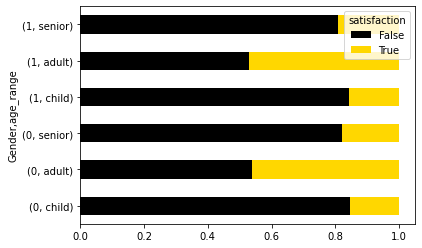

In [15]:
satisfaction_counts = pd.crosstab([airline_df['Gender'],airline_df['age_range']],airline_df.satisfaction.astype(bool))
satisfaction_rates = satisfaction_counts.div(satisfaction_counts.sum(1).astype(float),axis=0)
print(satisfaction_rates)
satisfaction_rates.plot(kind='barh',stacked=True,color=['black','gold'])

Both male and female show the almost same satisfaction percentage.

Similarly both male and female child categories show the lowest satisfaction percentage (~15%).

-- It is interesting to see that the children are the least satisfied. 

#### May be the airline industry to focus more on children so that they inturn persuade the adults for more air travel.

Airline industry should also tend the focus towards the seniors to increase the satisfaction level as the satisfaction level of seniors (17-19%) is not far from children (~15%).

------

-- Satisfaction grouped by class  Eco as 0; Eco Plus as 1 and Business as 2.

satisfaction                 False     True 
customer_class age_range                    
0              child      0.885705  0.114295
               adult      0.798644  0.201356
               senior     0.879100  0.120900
1              child      0.891046  0.108954
               adult      0.730725  0.269275
               senior     0.846552  0.153448
2              child      0.620818  0.379182
               adult      0.290496  0.709504
               senior     0.653760  0.346240


<AxesSubplot:ylabel='customer_class,age_range'>

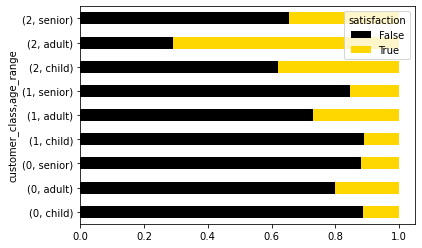

In [16]:
satisfaction_counts = pd.crosstab([airline_df['customer_class'],airline_df['age_range']],airline_df.satisfaction.astype(bool))
satisfaction_rates = satisfaction_counts.div(satisfaction_counts.sum(1).astype(float),axis=0)
print(satisfaction_rates)
satisfaction_rates.plot(kind='barh',stacked=True,color=['black','gold'])

There is a sharp satisfaction rate jump for all age groups when flight class changes from Eco/Eco Plus to Business. 
 
 #### Airlines should focus more on Eco, Eco Plus services to increase the satisfaction percentage. 
 #### We also noticed that there are slightly satisfaction rate decreases when flight class changes from Eco to Eco Plus. Based on our own airline experience, the services of Eco and Eco Plus don't have any differences, but price of flight ticket for Eco Plus is more experience than Eco which we doubt this is the main reason of satisfaction rate decreases.
 
 ------------

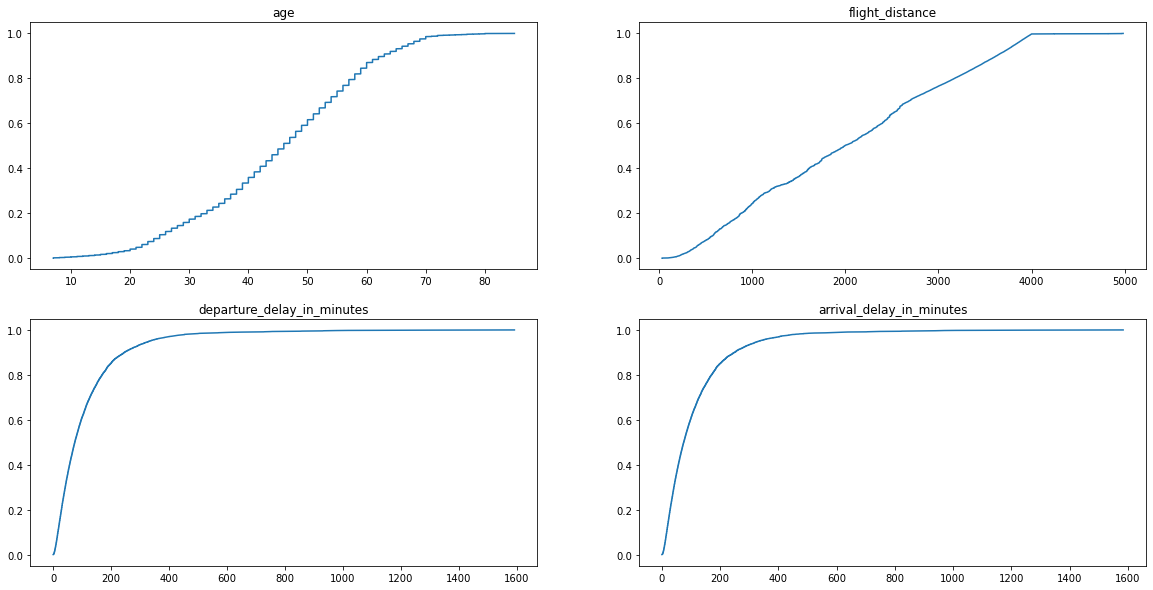

In [17]:
# make empirical CDFs
plt.figure(figsize=(20,10))
for fi,feature in enumerate(['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']):
    plt.subplot(2,2,fi+1)
    x_ax = np.sort(airline_df[feature])
    y_ax = np.cumsum(x_ax)
    y_ax = y_ax/np.max(y_ax)
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    
plt.show()

The CDF plots of four continuous varialbes show that:
Customers' ages are mostly distributed between 20 to 70. The flight distance is mostly(95%) within 4000 miles. The departure/arrival delay time are mostly (90%) within 200 minutes.

## 7.0 Explore Joint Attributes

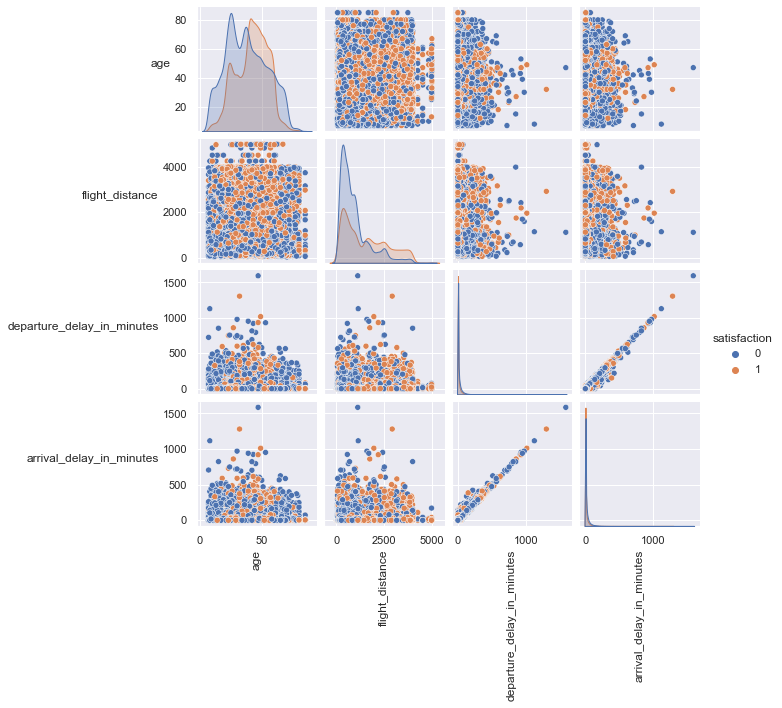

In [36]:
import seaborn as sns
sns.set()
g = sns.pairplot(airline_df[airline_continuous_features_satis], hue="satisfaction", height=2)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

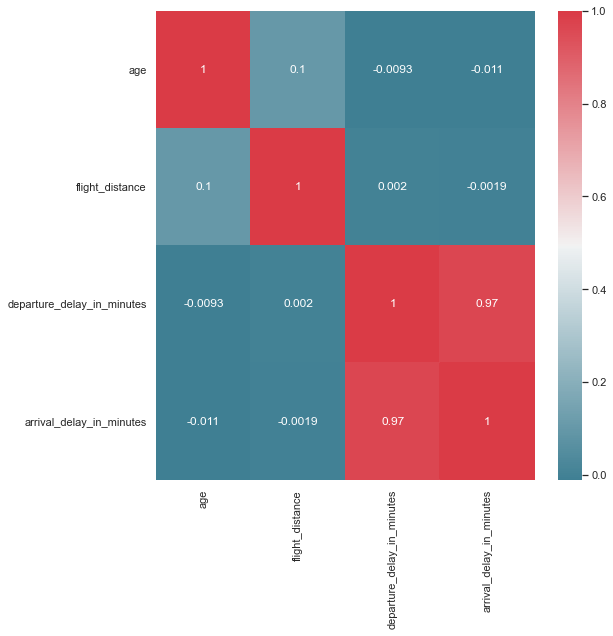

In [42]:
sns.set(style='darkgrid')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax= plt.subplots(figsize=(9,9))

sns.heatmap(airline_df[airline_continuous_features].corr(),cmap=cmap,annot=True)
f.tight_layout()

#### Departure delay and arrival delay are highly correlated among continuous variables.

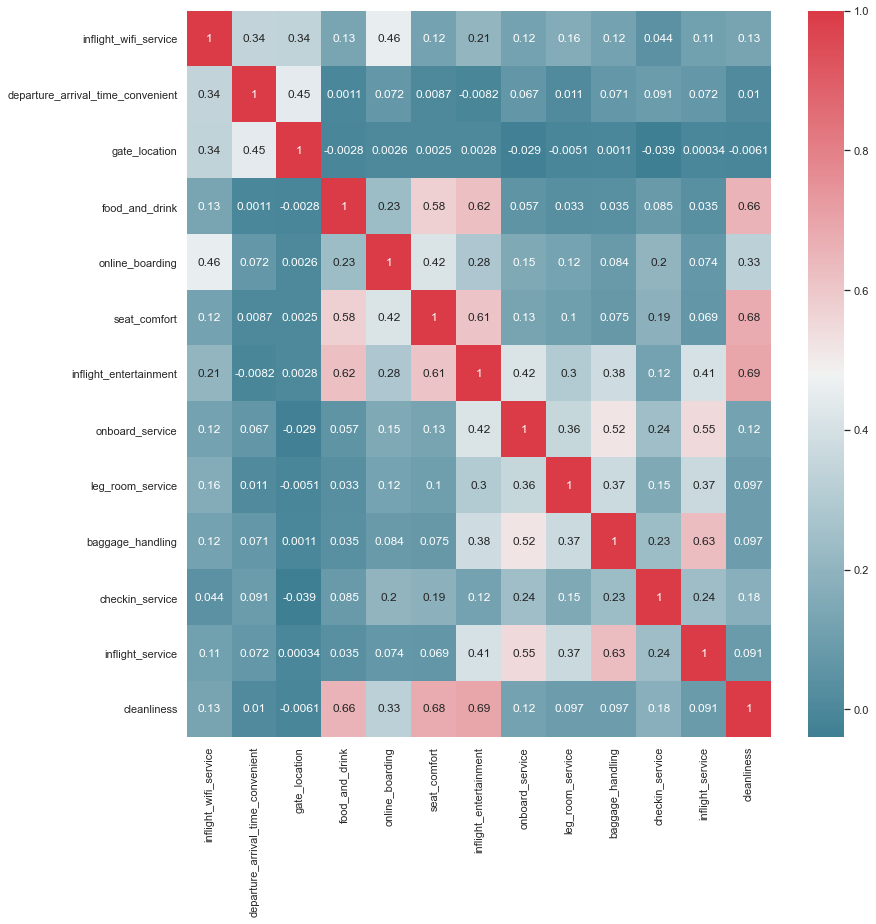

In [45]:
f, ax= plt.subplots(figsize=(13,13))
sns.heatmap(airline_df[airline_ordinal_features].corr(),cmap=cmap,annot=True)
f.tight_layout()

#### Airline cleaness rating is highly correlated with food and drink, seat comfort and inflight enternainment ratings.

----

Leg room v. Customer class.


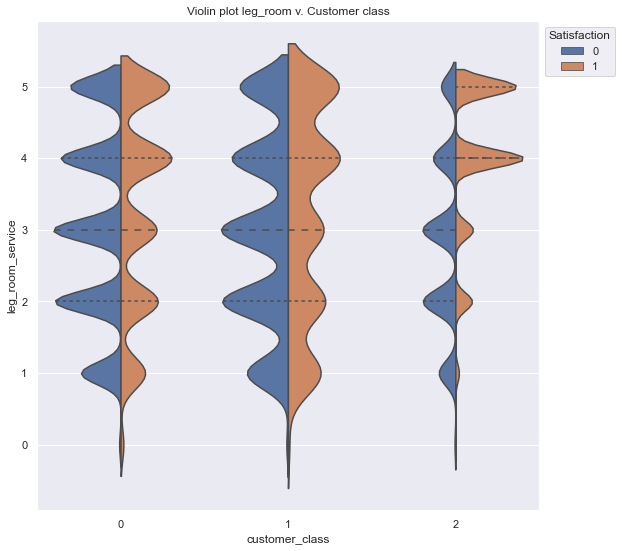

In [46]:
fig, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="customer_class", y="leg_room_service", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")


plt.title('Violin plot leg_room v. Customer class')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

It is observed from the above violin plot that Business class customers who rated higher leg room service also have high probability that they were satisfied their entire journeys.

It is also observed that no matter what flight class that customer belongs to, if a customer rated the leg room service equal or  below 3, he/she was less likely to have a satisfied journey.

-------

Customer Type v. Flight distance

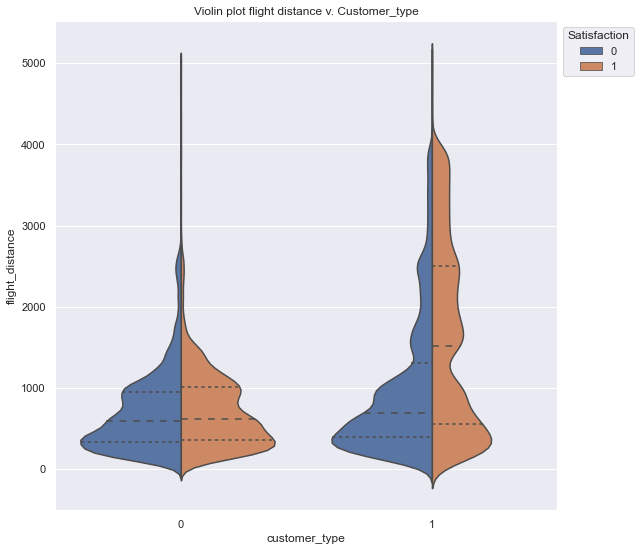

In [47]:
fig, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="customer_type", y="flight_distance", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")
plt.title('Violin plot flight distance v. Customer_type')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

The plot shows not many disloyal customers took long distance flights and their satisfaction rates are almost equally distributed.
Loyal customers prefer to take long distance flights and their satifaction rates increase while their flight distances increase.

<AxesSubplot:xlabel='cleanliness', ylabel='seat_comfort'>

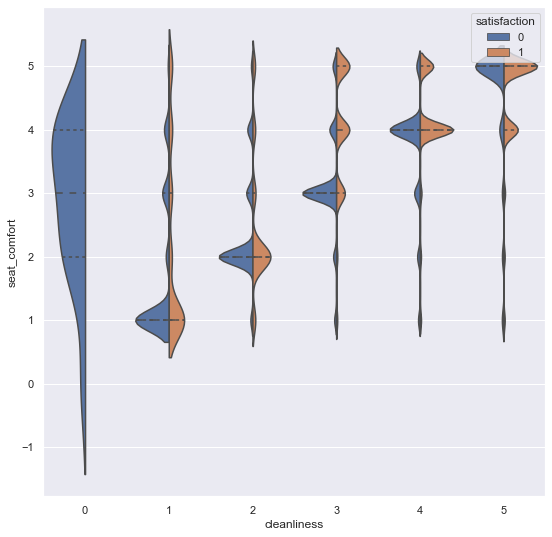

In [51]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x="cleanliness", y="seat_comfort", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")

It is observed from the above violin plot that if a customer rated the flight cleanliness to zero, then he or she will not have a satisfied journey. 

It is also observed that majority of the customers have the same seat comfort rating and flight cleanliness rating. Even if a customer rated flight cleanliness and seat comfort to 4 or 5, he or she may still have about 50% chance that he/she was not satisfied the entire journey.

<AxesSubplot:xlabel='Gender', ylabel='age'>

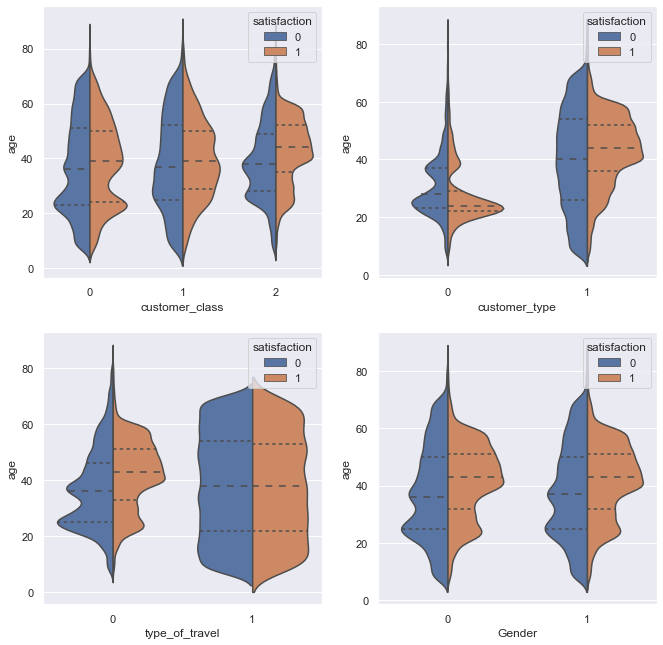

In [53]:
f, ax = plt.subplots(figsize=(11,11))
plt.subplot(2,2,1)
sns.violinplot(x="customer_class", y="age", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")
plt.subplot(2,2,2)
sns.violinplot(x="customer_type", y="age", hue="satisfaction", data=airline_df, split=True, inner="quart")

plt.subplot(2,2,3)
sns.violinplot(x="type_of_travel", y="age", hue="satisfaction", data=airline_df, split=True, inner="quart")

plt.subplot(2,2,4)
sns.violinplot(x="Gender", y="age", hue="satisfaction", data=airline_df, split=True, inner="quart")

## 8.0 Explore Attributes and Class

In [ ]:
g = sns.PairGrid(airline_df, y_vars="satisfaction",
                 x_vars=['inflight_wifi_service','food_and_drink','seat_comfort','inflight_entertainment',
                    'onboard_service',  'leg_room_service','inflight_service','cleanliness'],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1, errwidth=6, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

In [ ]:
g = sns.PairGrid(airline_df, y_vars="satisfaction",
                 x_vars=['gate_location','departure_arrival_time_convenient',
                    'online_boarding','baggage_handling' ,'checkin_service' ],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1, errwidth=6, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

## 9.0 New Features

There are plenty of other features that could be in this dataset to better determine and assess customer satisfaction. A key factor is any satisfaction analysis is price, there could be a continuious variable that shows the price of the flight or an ordinal ranking 1 to 5 about the price of flight according to the customer.

Other key features could be useful would be airline used, type of aircraft, starting and ending destination. Satisfaction could be highly correlated or clustered by the inclusion of these additional fields.

## 10.0 Exceptional Work (PCA)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()

airline_df_cont = airline_df[airline_continuous_features]

airline_df_ord = airline_df[airline_ordinal_features]

scaled_cont=airline_df_cont.copy()
scaled_cont=pd.DataFrame(scaler.fit_transform(scaled_cont), columns=scaled_cont.columns)
scaled_cont.head()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
0,-1.748219,-0.731999,0.273026,0.075623
1,-0.954439,-0.957550,-0.359673,-0.236345
2,-0.888290,-0.048329,-0.386036,-0.392329
3,-0.954439,-0.629749,-0.096049,-0.158353
4,1.426902,-0.978601,-0.386036,-0.392329


In [20]:
scaled_ord=airline_df_ord.copy()
scaled_ord=pd.DataFrame(scaler.fit_transform(scaled_ord), columns=scaled_ord.columns)
scaled_ord.head()

,inflight_wifi_service,departure_arrival_time_convenient,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
0,0.204220,0.617410,-1.546271,1.349963,-0.187111,1.181364,1.230701,0.479240,-0.266751,0.311941,0.547933,1.153847,1.304624
1,0.204220,-0.692535,0.018061,-1.657783,-0.187111,-1.850863,-1.767475,-1.851712,1.252860,-0.535461,-1.821471,0.303947,-1.740400
2,-0.548095,-0.692535,-0.764105,1.349963,1.293662,1.181364,1.230701,0.479240,-0.266751,0.311941,0.547933,0.303947,1.304624
3,-0.548095,1.272383,1.582393,-0.905846,-0.927497,-1.092806,-1.017931,-1.074728,1.252860,-0.535461,-1.821471,0.303947,-0.979144
4,0.204220,-0.037562,0.018061,0.598027,1.293662,1.181364,-0.268387,-0.297744,0.493055,0.311941,-0.241868,-0.545953,-0.217888


In [27]:
pca_cont = PCA(n_components=4, svd_solver = 'auto')
Principal_components_cont=pca.fit_transform(scaled_cont)
pca_df = pd.DataFrame(data = Principal_components_cont, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
print(pca_df)

            PC 1      PC 2      PC 3      PC 4
0       0.274153 -1.749904  0.717213 -0.143643
1      -0.405450 -1.357100  0.002464  0.083448
2      -0.536767 -0.668357  0.599574 -0.005627
3      -0.164421 -1.121966  0.231938 -0.046908
4      -0.570485  0.309429 -1.695708 -0.005483
...          ...       ...       ...       ...
129482 -0.543856 -0.731310 -0.211192 -0.006709
129483 -0.532996 -1.160358  0.388573 -0.007229
129484 -0.527251 -1.311727  0.798283 -0.007190
129485 -0.524697 -1.239893  1.150494 -0.006596
129486 -0.551486 -0.543196 -0.771169 -0.006814

[129487 rows x 4 columns]


In [28]:
pca_ord = PCA(n_components=13, svd_solver = 'auto')
Principal_components_ord=pca_ord.fit_transform(scaled_ord)
pca_df_ord = pd.DataFrame(data = Principal_components_ord, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'
, 'PC 8' , 'PC 9'  , 'PC 10'   , 'PC 11'  , 'PC 12' , 'PC 13'])
print(pca_df_ord)

            PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0      -2.462492  0.602047  1.020147  0.308226 -0.681509  0.687669 -1.153725   
1       3.342502 -1.299421 -0.384071 -0.274166  2.225253 -1.034707  0.401903   
2      -2.410595  1.277610  1.337478 -0.501905 -0.243106  0.571367  0.050497   
3       2.154433 -1.031114 -1.555715  1.723803  0.863814 -1.371122 -0.321098   
4      -0.707533  0.790109 -0.325215 -0.798165  0.604546 -0.304787 -0.033627   
...          ...       ...       ...       ...       ...       ...       ...   
129482 -0.893882  0.316704  1.057321 -0.212011 -0.622543  1.199875 -0.383336   
129483 -2.460177 -1.128294 -0.925693 -0.280748 -0.491893 -0.685043  0.442910   
129484  1.418394 -2.025488 -1.202387  0.881005 -2.156628 -0.371552  0.323690   
129485 -1.364225  0.023598  0.086746 -0.020374 -0.627450  1.269657  0.694534   
129486  4.193978  1.966394 -2.130230  1.371384  0.116353 -0.545607 -0.477199   

            PC 8      PC 9     PC 10   

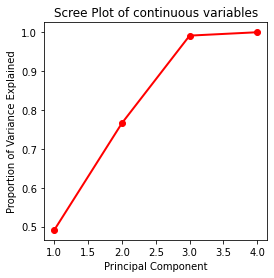

Proportion of Variance Explained :  [0.49137782 0.2749376  0.2250097  0.00867488]
Cumulative Prop. Variance Explained:  [0.49137782 0.76631541 0.99132512 1.        ]


In [34]:
PC_values_cont = np.arange(pca_cont.n_components) + 1
plt.figure(figsize=(4,4))

plt.plot(PC_values_cont, pca.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.title('Scree Plot of continuous variables')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

From the Scree Plot of continuous variables, 3 PCAs can explain 99% proportion of variance.

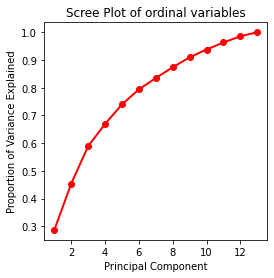

Proportion of Variance Explained :  [0.28715646 0.1670837  0.13510922 0.07990125 0.07090247 0.05364757
 0.04109563 0.0390027  0.03553723 0.02828628 0.02529568 0.02253213
 0.01444969]
Cumulative Prop. Variance Explained:  [0.28715646 0.45424016 0.58934938 0.66925063 0.7401531  0.79380066
 0.83489629 0.87389899 0.90943622 0.9377225  0.96301818 0.98555031
 1.        ]


In [33]:
PC_values_ord = np.arange(pca_ord.n_components) + 1
plt.figure(figsize=(4,4))

plt.plot(PC_values_ord, pca_ord.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.title('Scree Plot of ordinal variables')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
print ("Proportion of Variance Explained : ", pca_ord.explained_variance_ratio_)  
    
out_sum_ord = np.cumsum(pca_ord.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum_ord)

From the Scree Plot of ordinal variables, 9 PCAs can explain 90% proportion of variance.